# Lecture 2 - Task 1: Classifying Items of Clothing

This code is by no means original and is heavily based on https://www.tensorflow.org/tutorials/keras/classification. It serves as the "Hello World" programming example for a neural network. <br>
<br>
Jos Cooper

***
## Importing

We first need to import all the tools that have made machine learning easy in the last few years.

In [1]:
import numpy as np               # Everything needs NumPy.
import matplotlib.pyplot as plt  # For plotting.
import tensorflow as tf          # TensorFlow has made ML simple.
from tensorflow import keras     # Keras makes using TensorFlow even easier!

# Check we are running a TensorFlow version > 2.0
# There were major changes between 1.x and 2.x.
print(tf.__version__)

2.3.1


***
## Data Loading and Normalisation

Keras comes with some datasets that have been curated for us. In this example, we are using 70,000 greyscale images of different fashion items (an alternative to character recognition). There are 10 different categories and the dataset even comes with its own data loader.

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

We now define our class names. These are for our benefit so we know what the numerical labels mean.

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Lets inspect the data a bit

In [4]:
print("Size of training set = ", train_images.shape)
print("First label = ", train_labels[0])
print("Size of label set = ", train_labels.shape)

Size of training set =  (60000, 28, 28)
First label =  9
Size of label set =  (60000,)


The dataset has been split into 60,000 training images and 10,000 test images. Note: no validation here (yet). We can tell that each image is 28x28 pixels (not a large resolution, but you will see why shortly)

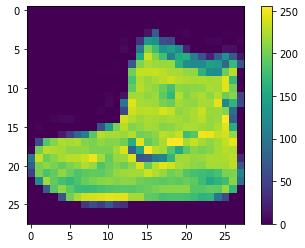

In [5]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.gca().grid(False)

We now see that, as expected, the first entry in the dataset is an "Ankle boot", but what actually is this image?

In [6]:
# Inspect some pixels.
print("Corner pixel = ", train_images[0][0,0])
print("A middle pixel = ", train_images[0][10,20])

Corner pixel =  0
A middle pixel =  210


We want to normalise these pixel values to be [0,1] (greyscale) rather than [0,255]. Operations that are applied before training are common in machine learning and the process is often referred to as preprocessing.

In [7]:
train_images = train_images / 255
test_images = test_images / 255

Lets plot some examples of our pre-processed data

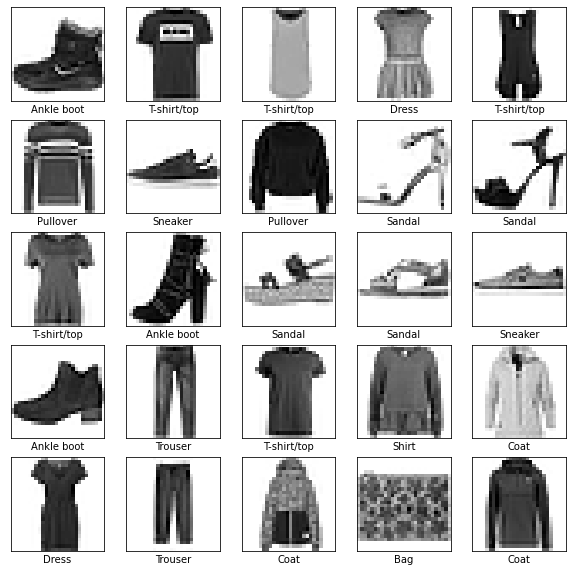

In [8]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

***
## Building a Network!

Using Keras, creating a network fairly straightforward. Here we first define an input layer that flattens our 28x28 pixel images to be fed forwards into two dense layers.

In [9]:
model = keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(128, activation=tf.nn.relu),
                          keras.layers.Dense(10, activation=tf.nn.softmax)])

***
## Training the Network

Again, Keras makes training our network simple too! Before training, we must first compile the model. This is the one hint in this example that Keras/TensorFlow is not just straight python.

In [10]:
model.compile(optimizer="ADAM",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [11]:
# Summary shows us how large our network is, and how many parameters it has.
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


After compiling our model, we can now set it training.

In [12]:
# You will see why we set this as a variable soon.
history = model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4988 - accuracy: 0.8249
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3727 - accuracy: 0.8656
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3357 - accuracy: 0.8775
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3107 - accuracy: 0.8853
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2918 - accuracy: 0.8921
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2789 - accuracy: 0.8957
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2665 - accuracy: 0.8997
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2562 - accuracy: 0.9046
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2456 - accuracy: 0.9080
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.237

__Notice that the more we train the better our accuracy becomes!__

But if we evaluate our model on the test data, our accuracy is not as good.

In [13]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test Accuracy:", test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.3371 - accuracy: 0.8828
Test Accuracy: 0.8827999830245972


***
## What went wrong?

Using the variable that we previously stored to, we can look at the history of the training.

In [14]:
# The history attribute contains a dictionary.
# This dictionary records the loss and accuracy after each epoch.
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy'])

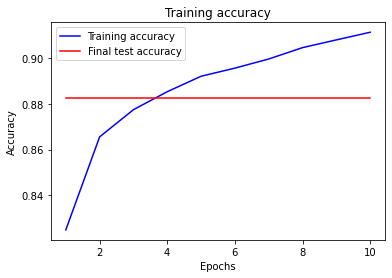

In [15]:
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(1, len(acc) + 1)  # Giving us something to plot against

# Plot training accuracy and final test accuracy vs. epochs.
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, test_acc*np.ones(len(epochs)), 'r', label='Final test accuracy')
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

So why is the gap between training and test accuracy increasing? Lets examine the predictions.

In [16]:
predictions = model.predict(test_images)
print(predictions[0])
print(test_labels[0])

[6.78836886e-06 2.32955633e-09 8.02303202e-06 1.26008155e-08
 3.61342654e-06 1.63466285e-03 1.18096672e-04 2.36918241e-01
 1.77621459e-05 7.61292815e-01]
9


There seems to be multiple items of clothing with high probabilities and so they must be difficult to distinguish for our network. The following plots the first 25 test images, their predicted label, and the true label. Correct predictions are coloured in blue and incorrect predictions in red. The true labels are shown in brackets.

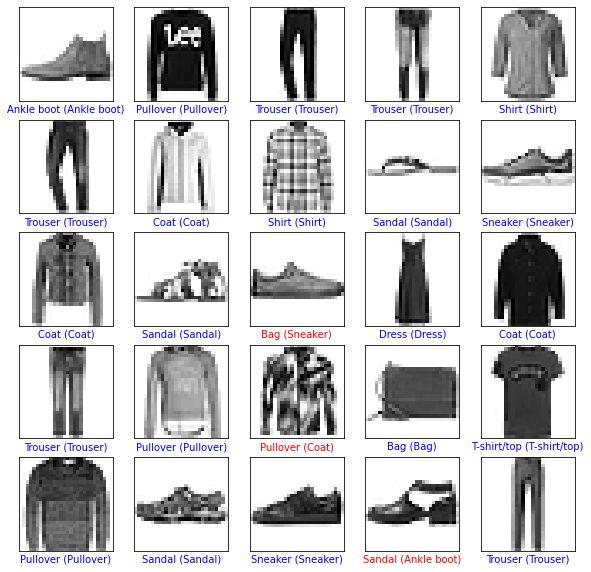

In [17]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel("{} ({})".format(class_names[predicted_label], 
                                class_names[true_label]),
                                color=color)

*** 
## Enabling Single Predictions

To test a single image we see that is it (as expected) a 28x28 pixel array.

In [18]:
img = test_images[0]
print(img.shape)

(28, 28)


However, to use model.predict, we need to make it a collection (of one), so we give it an extra dimension.

In [19]:
img = np.expand_dims(img,0)
print(img.shape)

(1, 28, 28)


Now we can predict on this single image.

In [20]:
predictions = model.predict(img)
print(predictions)

[[6.78838114e-06 2.32955588e-09 8.02304658e-06 1.26008128e-08
  3.61343677e-06 1.63466576e-03 1.18096985e-04 2.36918390e-01
  1.77621769e-05 7.61292696e-01]]


Not exactly what we want still. Instead, we take the most likely class as the one we choose. For more complex problems we are able to set thresholds here instead of a straight choice.

In [21]:
prediction = predictions[0]
print(class_names[np.argmax(prediction)])

Ankle boot


***
## Tasks

1. Play around with the network architecture and see if you can increase the accuracy for training and test: try a different optimiser, more/fewer epochs or more/fewer nodes or hidden layers (max 5 minutes playing advised).
2. Split the training data into a training and validation set, then implement a validation step during training (hint: look at the Keras API documentation for model.fit - this step is easier than you think).
3. Plot the training and validation loss and accuracy vs. epochs.
4. Change the prediction to admit when it doesn't really know, say based on some threshold of confidence (examine one it got wrong for example).

In [22]:
# Enter your code here.